In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #결측값을 시각화
import plotly.express as px #인터렉티브한 시각화가 가능한 파이썬 그래픽 라이브러리 
import plotly.graph_objects as go

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
#csv파일에서 데이터 가져오기
wanted_info_data = pd.read_csv('wanted_info.csv')
wanted_info_data

,IT직군,사용스킬,company_position,company_name
0,소프트웨어 엔지니어,Python,에이엠스퀘어 인공지능 개발자,에이엠스퀘어
1,소프트웨어 엔지니어,Python,금융 플랫폼 개발 (Unix/Linux C 개발자) - 신입,에이치투오시스템테크놀로지
2,소프트웨어 엔지니어,Python,[100억↑투자] [R&D] Functional Safety Engineer,비트센싱
3,소프트웨어 엔지니어,Python,NPU HW Engineer(전문연구요원),칩스앤미디어
4,소프트웨어 엔지니어,Python,무선전력전송 하드웨어 엔지니어,에타일렉트로닉스
...,...,...,...,...
8875,"CIO,Chief Information Officer",C++,[ESTsecurity] C++ 서버 개발자,이스트소프트(ESTsoft)
8876,"CIO,Chief Information Officer",C++,AI 개발자(신입),네비웍스
8877,"CIO,Chief Information Officer",C++,블록체인 전송 시스템 운영 담당자,위메이드(WEMADE)
8878,"CIO,Chief Information Officer",C++,[100억↑투자] [R&D] Radar System Test Engineer,비트센싱


In [31]:
duplicate =wanted_info_data.duplicated(subset=['company_position'],keep=False)
duplicates_df = wanted_info_data[duplicate]
duplicates_df.head(50)

,IT직군,사용스킬,company_position,company_name
0,소프트웨어 엔지니어,Python,에이엠스퀘어 인공지능 개발자,에이엠스퀘어
1,소프트웨어 엔지니어,Python,금융 플랫폼 개발 (Unix/Linux C 개발자) - 신입,에이치투오시스템테크놀로지
2,소프트웨어 엔지니어,Python,[100억↑투자] [R&D] Functional Safety Engineer,비트센싱
3,소프트웨어 엔지니어,Python,NPU HW Engineer(전문연구요원),칩스앤미디어
4,소프트웨어 엔지니어,Python,무선전력전송 하드웨어 엔지니어,에타일렉트로닉스
5,소프트웨어 엔지니어,Python,병역특례 Machine Learning 전문연구요원,매쓰홀릭
6,소프트웨어 엔지니어,Python,딥러닝 엔지니어 (전문연구요원 신규/전직 가능),룩코
7,소프트웨어 엔지니어,Python,[ESTsecurity] C++ 서버 개발자,이스트소프트(ESTsoft)
8,소프트웨어 엔지니어,Python,AI 개발자(신입),네비웍스
9,소프트웨어 엔지니어,Python,블록체인 전송 시스템 운영 담당자,위메이드(WEMADE)


<Axes: >

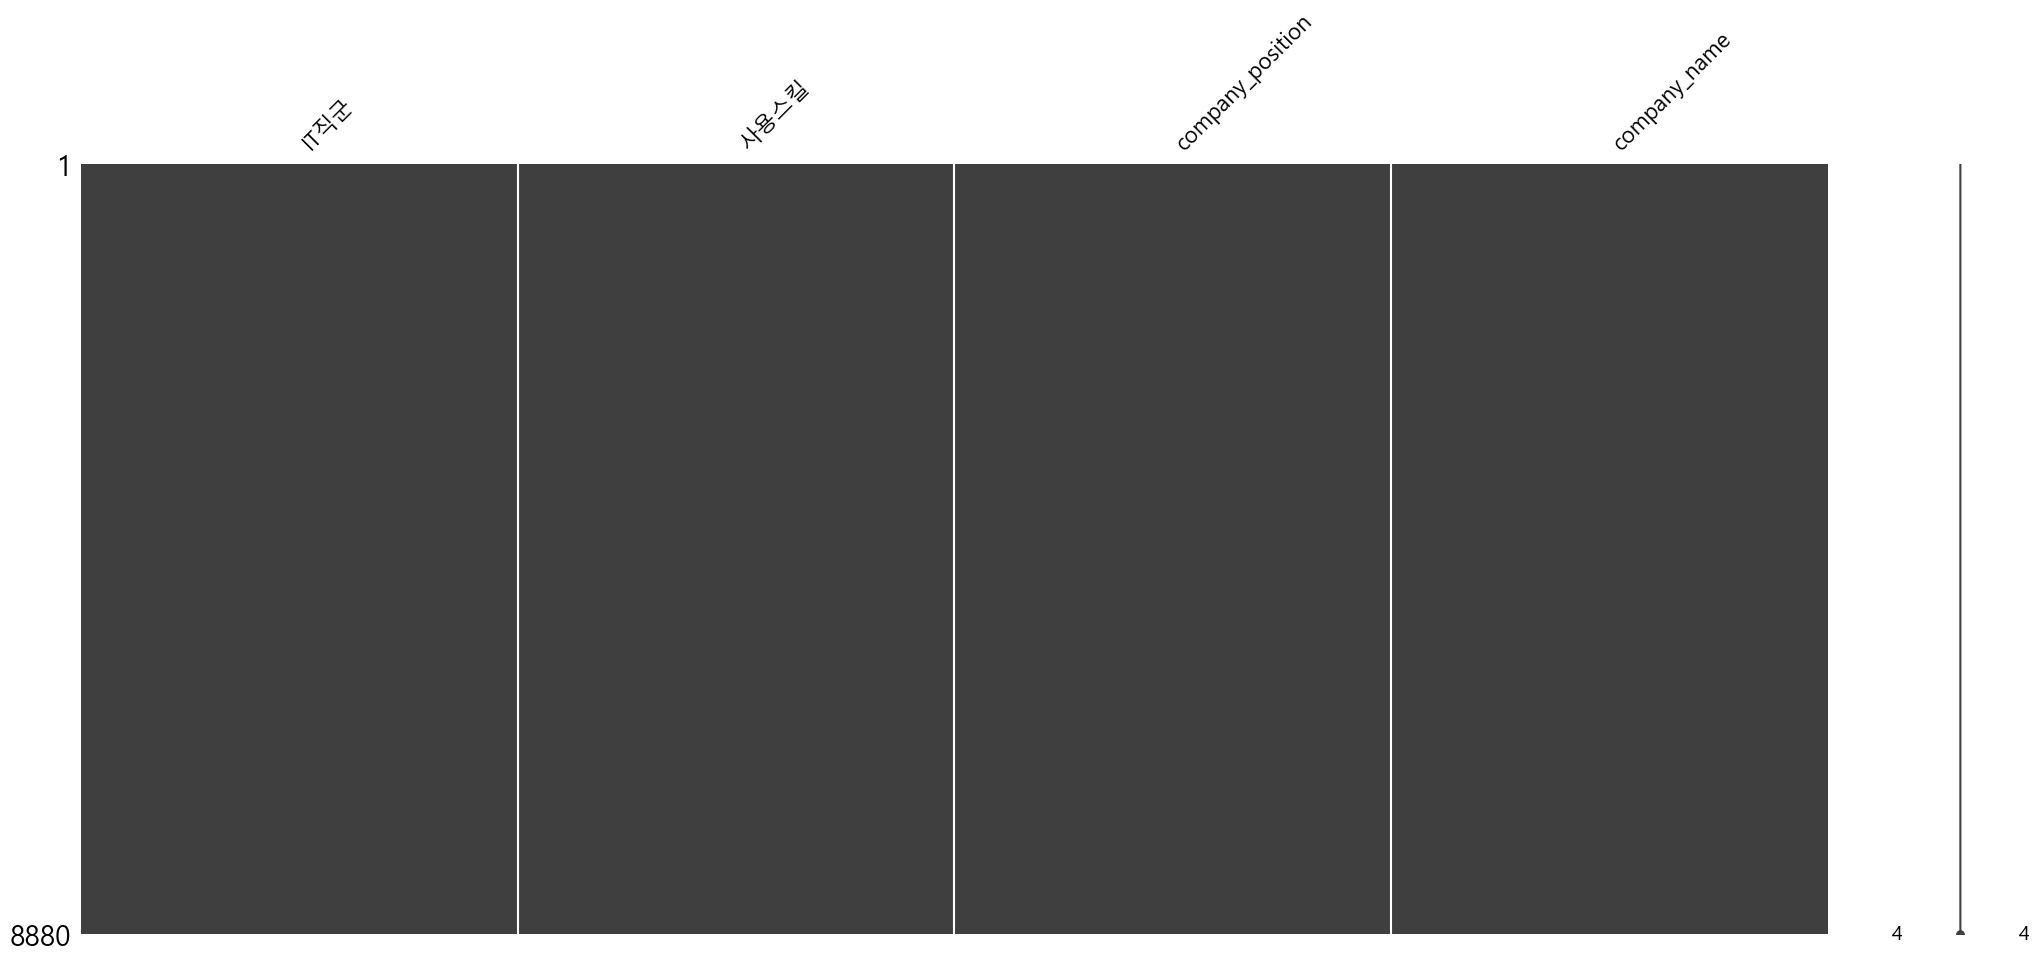

In [36]:
msno.matrix(wanted_info_data)

In [58]:
wanted_info_data.head(3)

,IT직군,사용스킬,company_position,company_name
0,소프트웨어 엔지니어,Python,에이엠스퀘어 인공지능 개발자,에이엠스퀘어
1,소프트웨어 엔지니어,Python,금융 플랫폼 개발 (Unix/Linux C 개발자) - 신입,에이치투오시스템테크놀로지
2,소프트웨어 엔지니어,Python,[100억↑투자] [R&D] Functional Safety Engineer,비트센싱


In [60]:
wanted_info_data.iloc[0]

IT직군                     소프트웨어 엔지니어
사용스킬                         Python
company_position    에이엠스퀘어 인공지능 개발자
company_name                 에이엠스퀘어
Name: 0, dtype: object

In [62]:
wanted_info_data[wanted_info_data['IT직군'] == '소프트웨어 엔지니어']['사용스킬'].value_counts()


사용스킬
Python              12
Spring Framework    12
JPA                 12
Github              12
React               12
Docker              12
PHP                 12
C / C++             12
Swift               12
Kotlin              12
Android             12
Linux               12
SQL                 12
MySQL               12
JavaScript          12
HTML                12
iOS                 12
Git                 12
AWS                 12
C++                 12
Name: count, dtype: int64

ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of labels (8880).

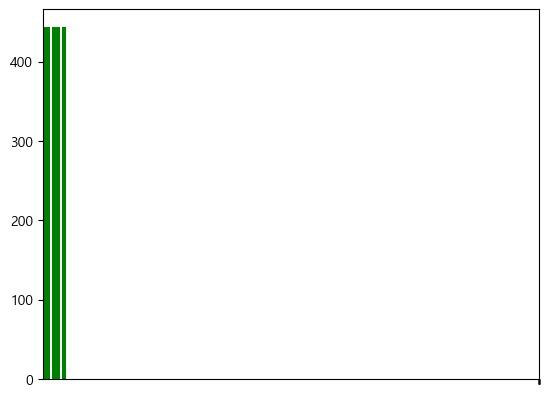

In [50]:
y = wanted_info_data['사용스킬'].value_counts()
skill = wanted_info_data['사용스킬'].drop_duplicates()
values = wanted_info_data['사용스킬']

plt.bar(skill, y, color='green')
plt.xticks(y, values)
# x축의 눈금 레이블에 '2018','2019','2020'이 순서대로 표시
plt.show()

In [41]:
skill = len(wanted_info_data['사용스킬'].drop_duplicates())
skill

20